## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv("./titanic.csv")

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(dataset.columns)
print("\n")

survival_rates = dataset.groupby("Sex")["Survived"].mean() * 100
print(survival_rates["male"])
print(survival_rates["female"])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


18.890814558058924
74.20382165605095


**Задача 2:** Відтворіть ці графіки  
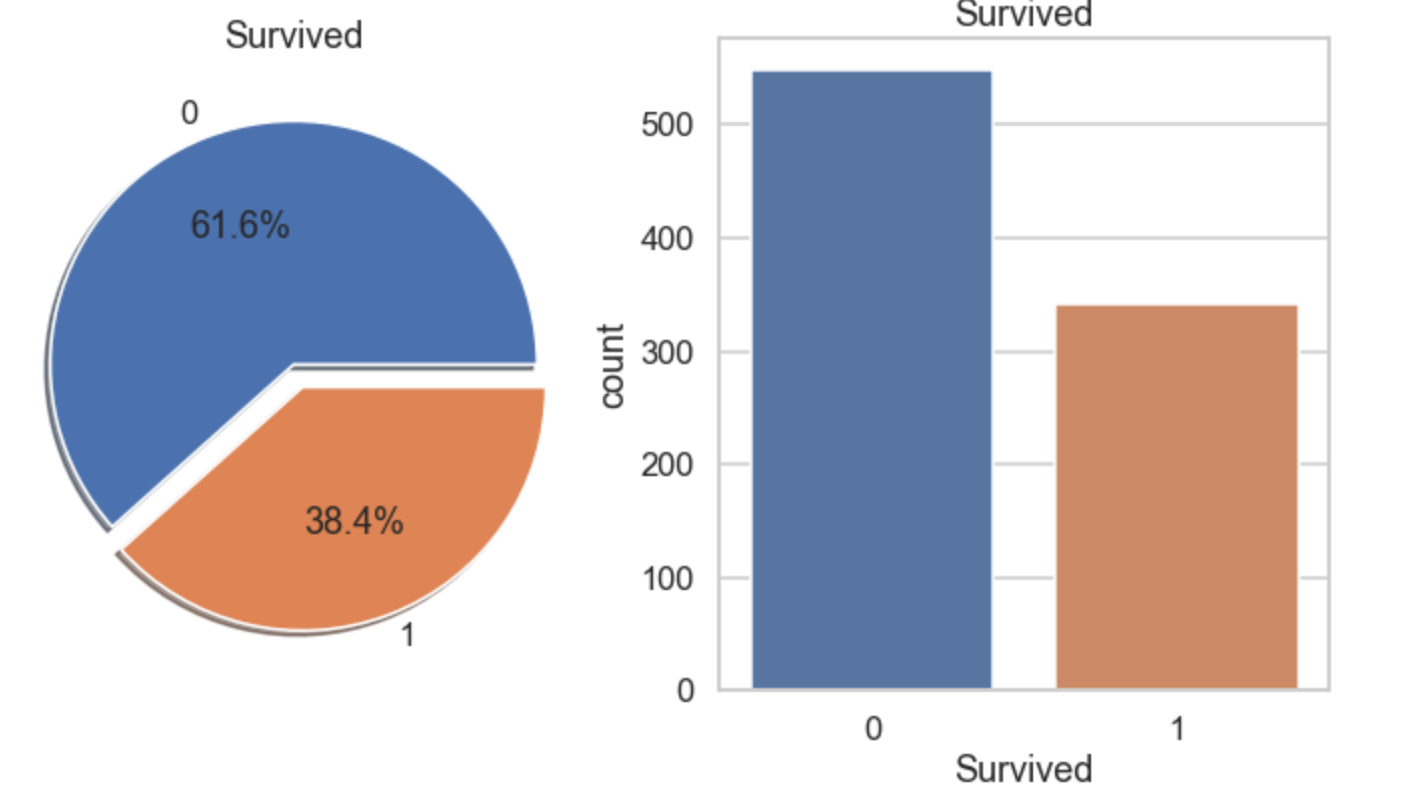


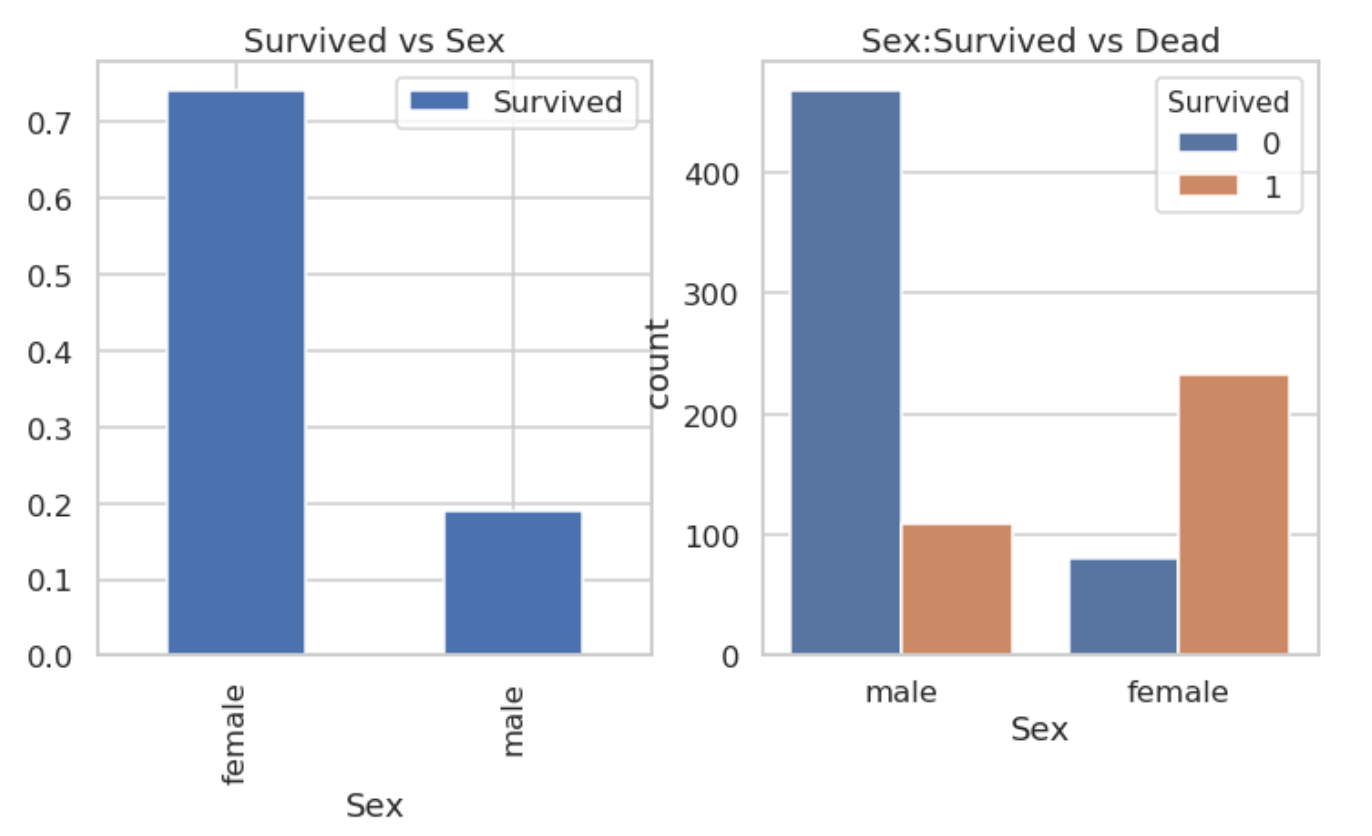

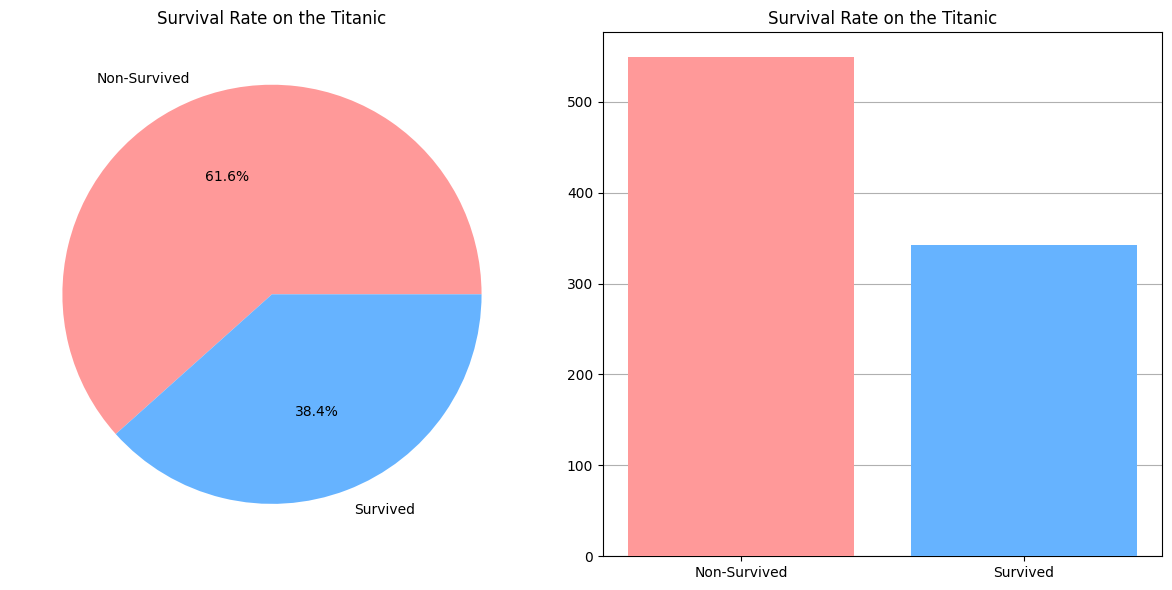

In [5]:
survival_counts = dataset["Survived"].value_counts()
labels = ["Non-Survived", "Survived"]
colors = ["#ff9999", "#66b3ff"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(survival_counts, labels=labels, autopct="%1.1f%%", colors=colors)
axes[0].set_title("Survival Rate on the Titanic")

axes[1].bar(labels, survival_counts, color=colors, zorder=3)
axes[1].grid(axis="y", zorder=0)
axes[1].set_title("Survival Rate on the Titanic")

plt.tight_layout()
plt.show()


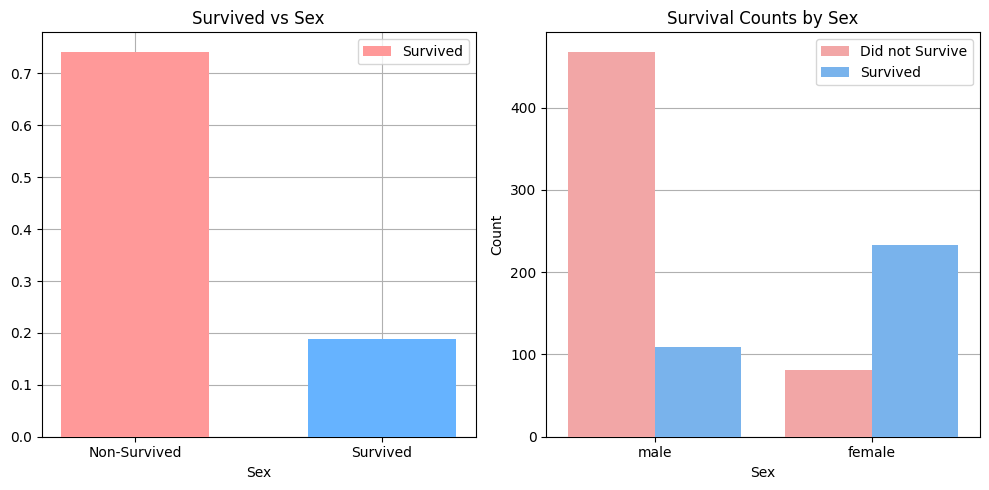

In [6]:
survival_counts = dataset.groupby(["Sex", "Survived"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(labels, survival_rates/100, color=colors, width=0.6, zorder=3)
axes[0].grid(True, zorder=0)
axes[0].set_title("Survived vs Sex")
axes[0].set_xlabel(labels, rotation=90)
axes[0].legend(["Survived"])
axes[0].set_xlabel("Sex", rotation=0)

sns.countplot(x="Sex", hue="Survived", data=dataset, ax=axes[1], palette=colors, zorder=3)
axes[1].grid(axis="y", zorder=0)
axes[1].set_ylabel("Count")
axes[1].set_title("Survival Counts by Sex")
axes[1].set_xlabel("Sex")
axes[1].legend(["Did not Survive", "Survived"])

plt.tight_layout()
plt.show()


Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [7]:
dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [8]:
def find_name(name):
    if "Miss." in name:
        return name.split("Miss. ")[1].split()[0]
    elif "Mrs." in name:
        return name.split("(")[1].split()[0] if "(" in name else name.split("Mrs. ")[1].split()[0]
    elif "Mr." in name:
        return name.split("Mr. ")[1].split()[0]
    return None

dataset['Cleaned_Female_Name'] = dataset[dataset["Sex"] == "female"]["Name"].map(find_name)
female_names = dataset['Cleaned_Female_Name']
print(female_names.value_counts())

print("\n Найпопулярніше жіноче ім'я: " + female_names.value_counts().idxmax())
    

Cleaned_Female_Name
Anna         14
Mary         13
Elizabeth    11
Margaret     10
Alice         6
             ..
Asuncion      1
Sallie        1
Hannah        1
Imanita       1
Gerda         1
Name: count, Length: 180, dtype: int64

 Найпопулярніше жіноче ім'я: Anna


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [9]:
dataset['Cleaned_Male_Name'] = dataset[dataset["Sex"] == "male"]["Name"].map(find_name)
male_names = dataset['Cleaned_Male_Name']
print(male_names.value_counts())

print("\n Найпопулярніше чоловіче ім'я: " + male_names.value_counts().idxmax())

Cleaned_Male_Name
William    30
John       21
George     12
Charles    12
James      11
           ..
Cerin       1
Frans       1
Nedelio     1
Kristo      1
Johann      1
Name: count, Length: 263, dtype: int64

 Найпопулярніше чоловіче ім'я: William


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
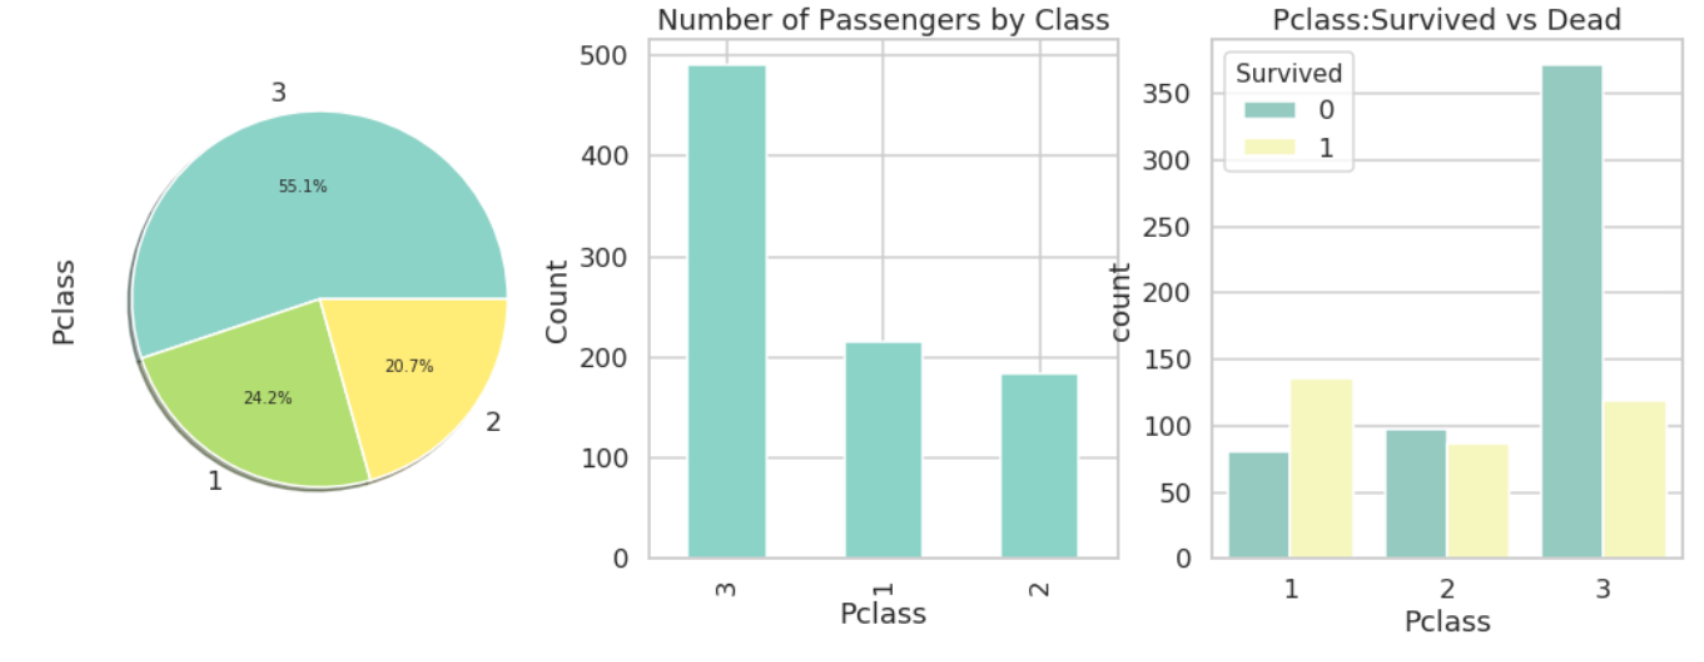

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


C:\Users\msnit\AppData\Local\Temp\ipykernel_33120\2657358439.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=dataset, x="Pclass", hue="Survived", ax=axes[2], palette=colors, zorder=3)


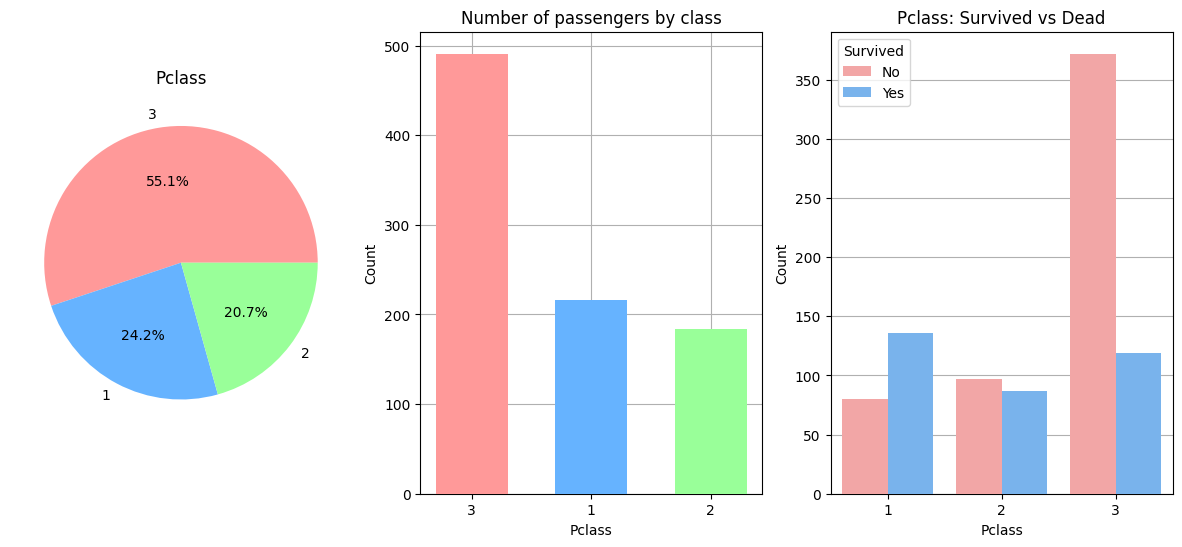

In [10]:
pclass_counts = dataset["Pclass"].value_counts()
print(pclass_counts)
colors = ["#ff9999", "#66b3ff", "#99ff99"]

fig, axes = plt.subplots(1, 3,  figsize=(15, 6))

axes[0].pie(pclass_counts, labels=pclass_counts.index, autopct="%1.1f%%", colors=colors)
axes[0].set_title("Pclass")

axes[1].bar(pclass_counts.index.astype(str), pclass_counts, color=colors, width=0.6, zorder=3)
axes[1].grid(True, zorder=0)
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Count")
axes[1].set_title("Number of passengers by class")

sns.countplot(data=dataset, x="Pclass", hue="Survived", ax=axes[2], palette=colors, zorder=3)
axes[2].grid(axis="y", zorder=0)
axes[2].set_title("Pclass: Survived vs Dead")
axes[2].set_xlabel("Pclass")
axes[2].set_ylabel("Count")
axes[2].legend(title="Survived", labels=["No", "Yes"])


Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
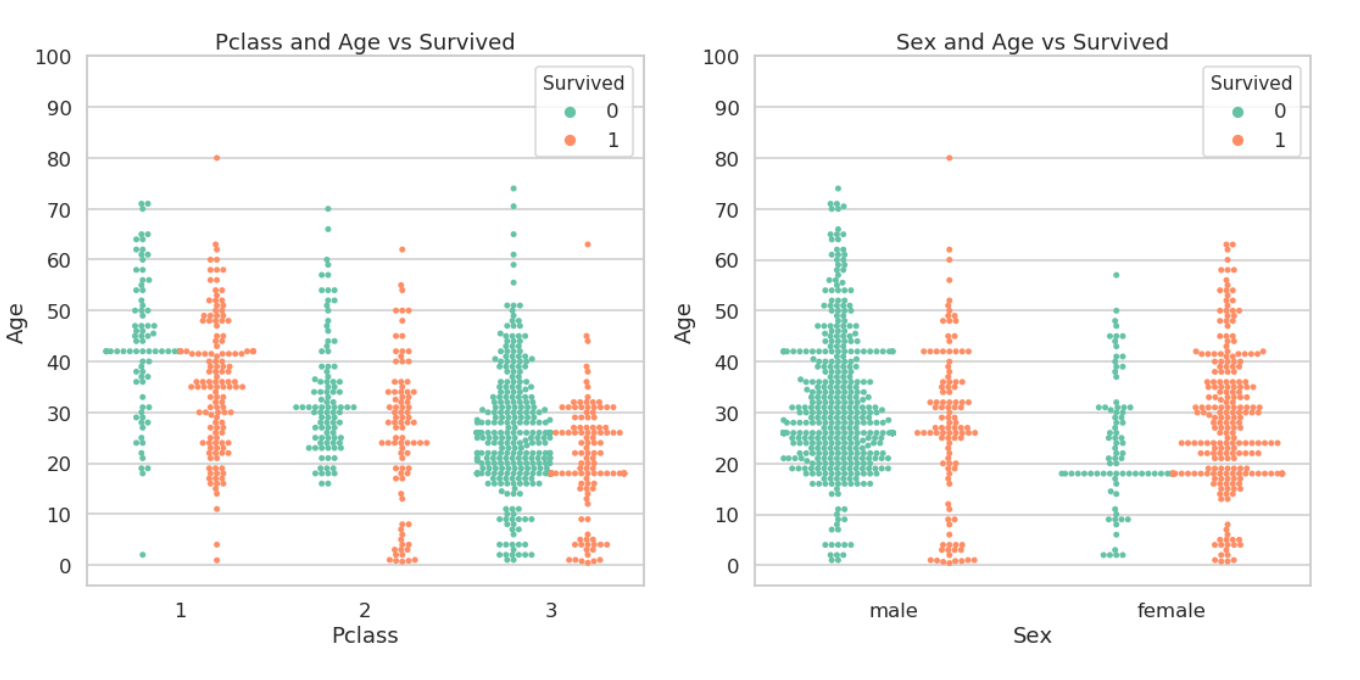![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

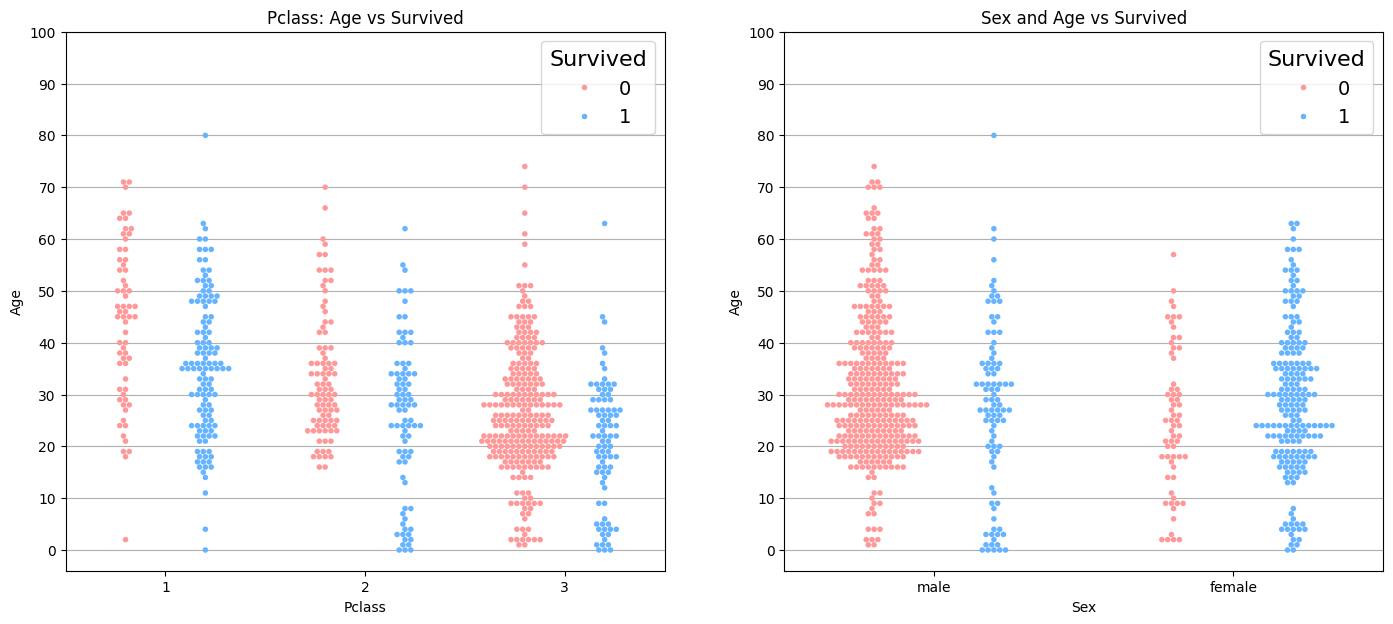

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))
colors = ["#ff9999", "#66b3ff"]

dataset["Age"] = dataset["Age"].dropna().astype(int)

axes[0].set_title("Pclass: Age vs Survived")
sns.swarmplot(data=dataset, x="Pclass",  y="Age", hue="Survived", ax=axes[0], palette=colors, dodge = True, size=4)
axes[0].grid(axis="y", zorder=0)
axes[0].set_yticks(range(0, 101, 10))
axes[0].legend(title="Survived", title_fontsize=16, fontsize=14)

axes[1].set_title("Sex and Age vs Survived")
sns.swarmplot(data=dataset, x="Sex",  y="Age", hue="Survived", ax=axes[1], palette=colors, dodge = True, size=4)
axes[1].grid(axis="y", zorder=0)
axes[1].set_yticks(range(0, 101, 10))
axes[1].legend(title="Survived", title_fontsize=16, fontsize=14)


Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

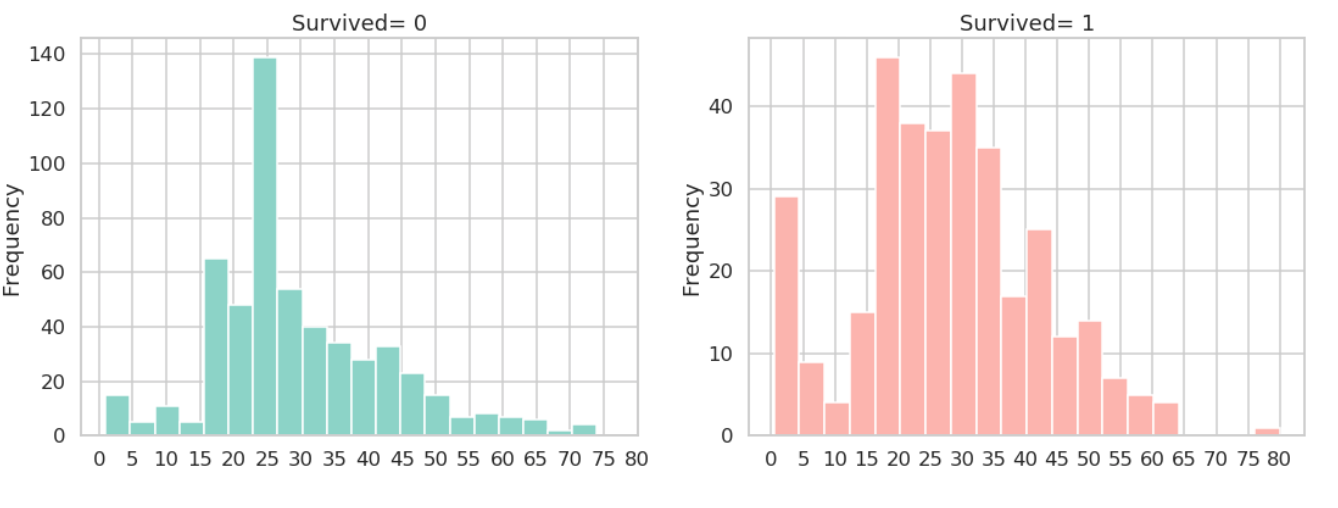



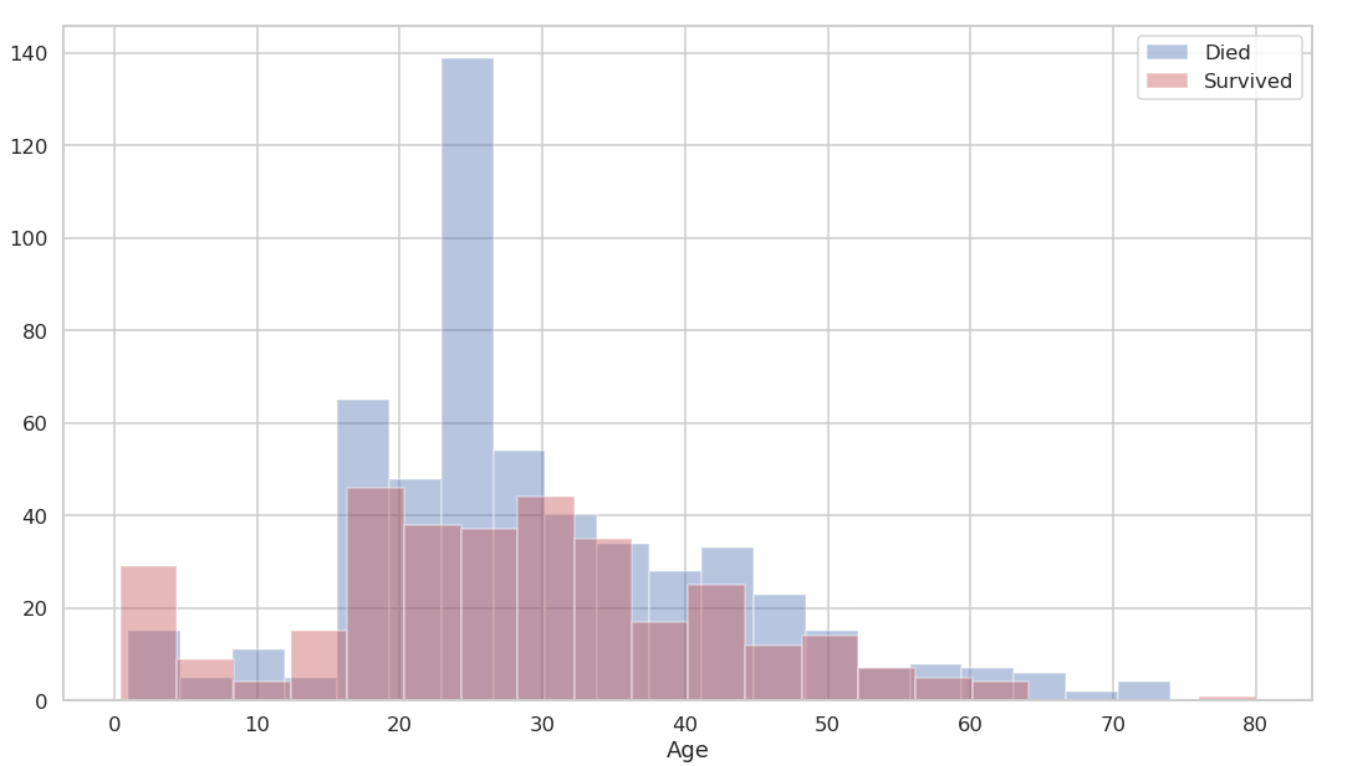

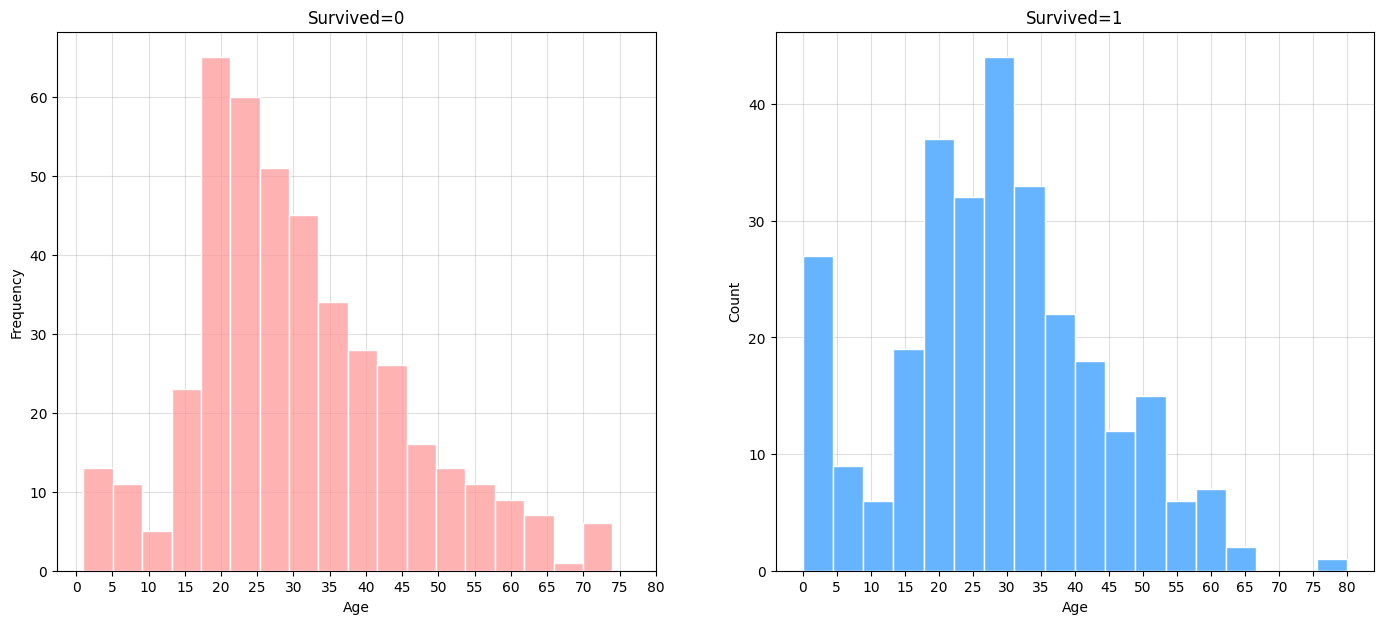

In [12]:
df_dead = dataset[dataset["Survived"] == 0]
df_survived = dataset[dataset["Survived"] == 1]

fig, axes = plt.subplots(1, 2, figsize=(17, 7))

sns.histplot(data=df_dead, x="Age", color="#ff9999", edgecolor="white", bins=18, ax=axes[0], zorder = 3)
axes[0].set_ylabel("Frequency")
axes[0].set_title("Survived=0")
axes[0].set_xticks(range(0, 81, 5))
axes[0].grid(True, alpha = 0.4, zorder=0)

sns.histplot(data=df_survived, x="Age", color="#66b3ff", edgecolor="white", bins=18, ax=axes[1], alpha=1, zorder = 5)
axes[0].set_ylabel("Frequency")
axes[1].set_title("Survived=1")
axes[1].set_xticks(range(0, 81, 5))
axes[1].grid(True, alpha = 0.4, zorder=-1)

plt.show()

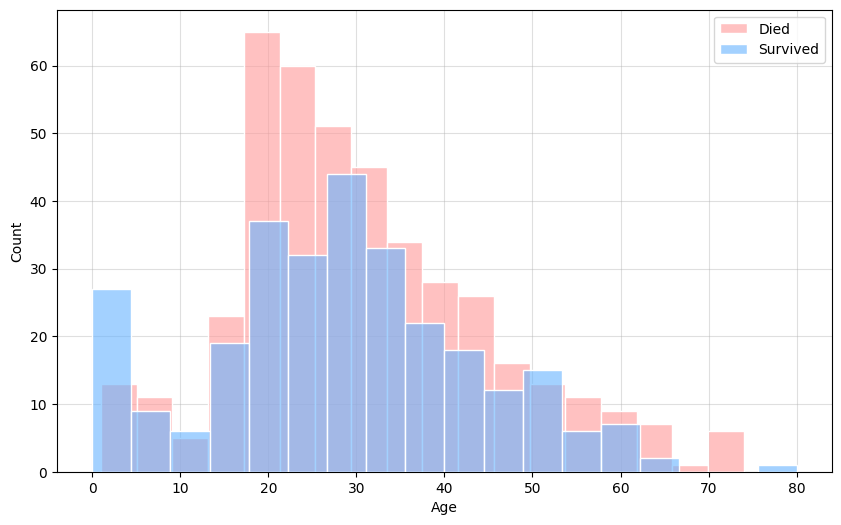

In [13]:
df_dead = dataset[dataset["Survived"] == 0]
df_survived = dataset[dataset["Survived"] == 1]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_dead, x="Age", color="#ff9999", edgecolor="white", bins=18, alpha=0.6, label="Died", zorder=3)
sns.histplot(data=df_survived, x="Age", color="#66b3ff", edgecolor="white", bins=18, alpha=0.6, label="Survived", zorder=4)

plt.xticks(range(0, 81, 10))
plt.grid(True, alpha=0.4, zorder=0)
plt.legend()

plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
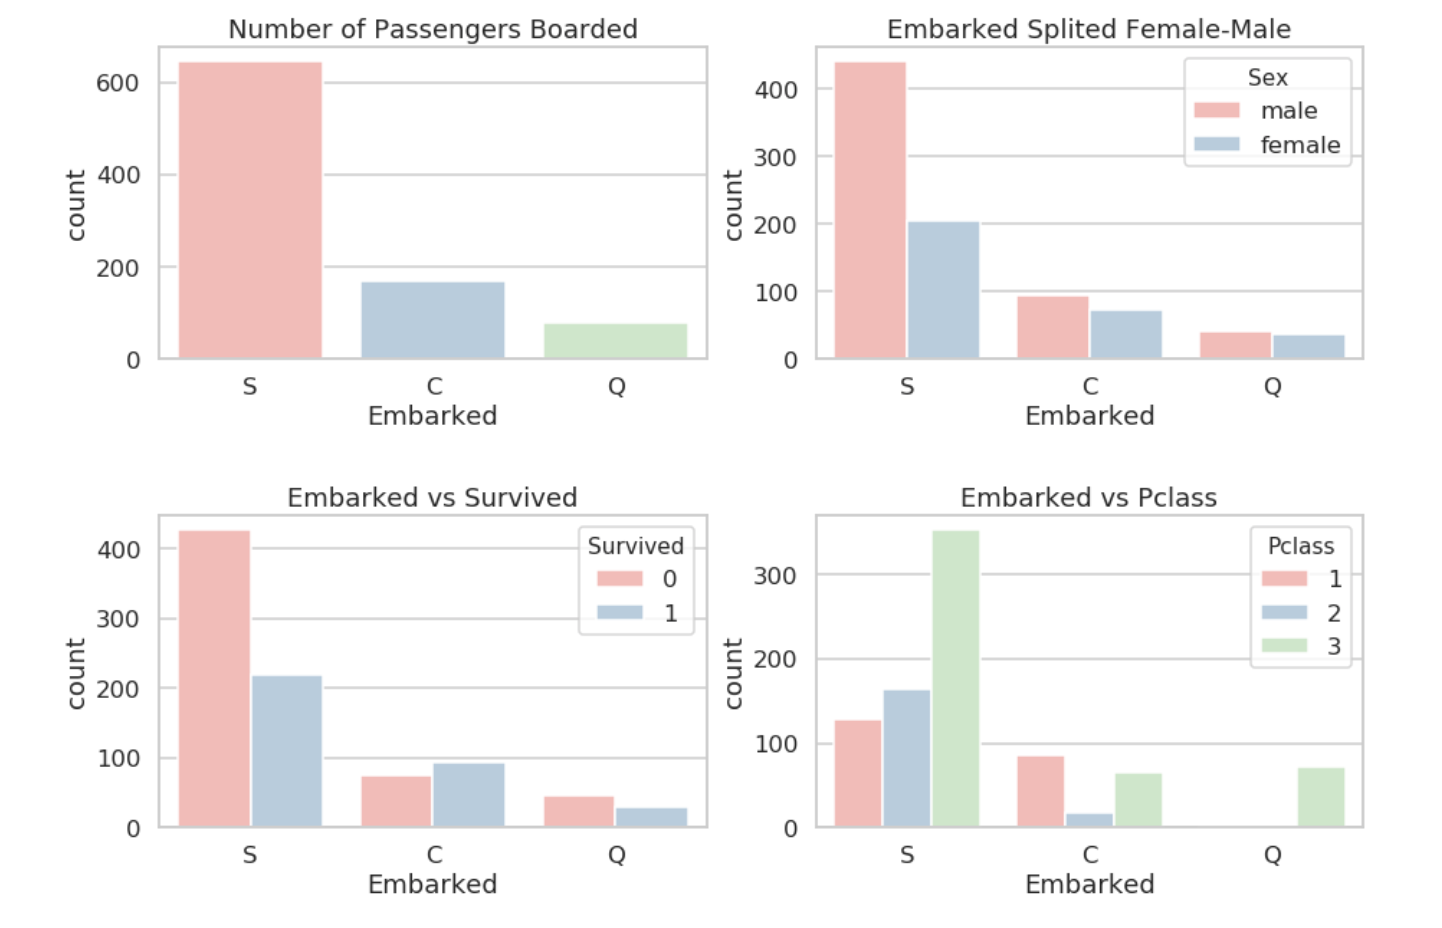

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


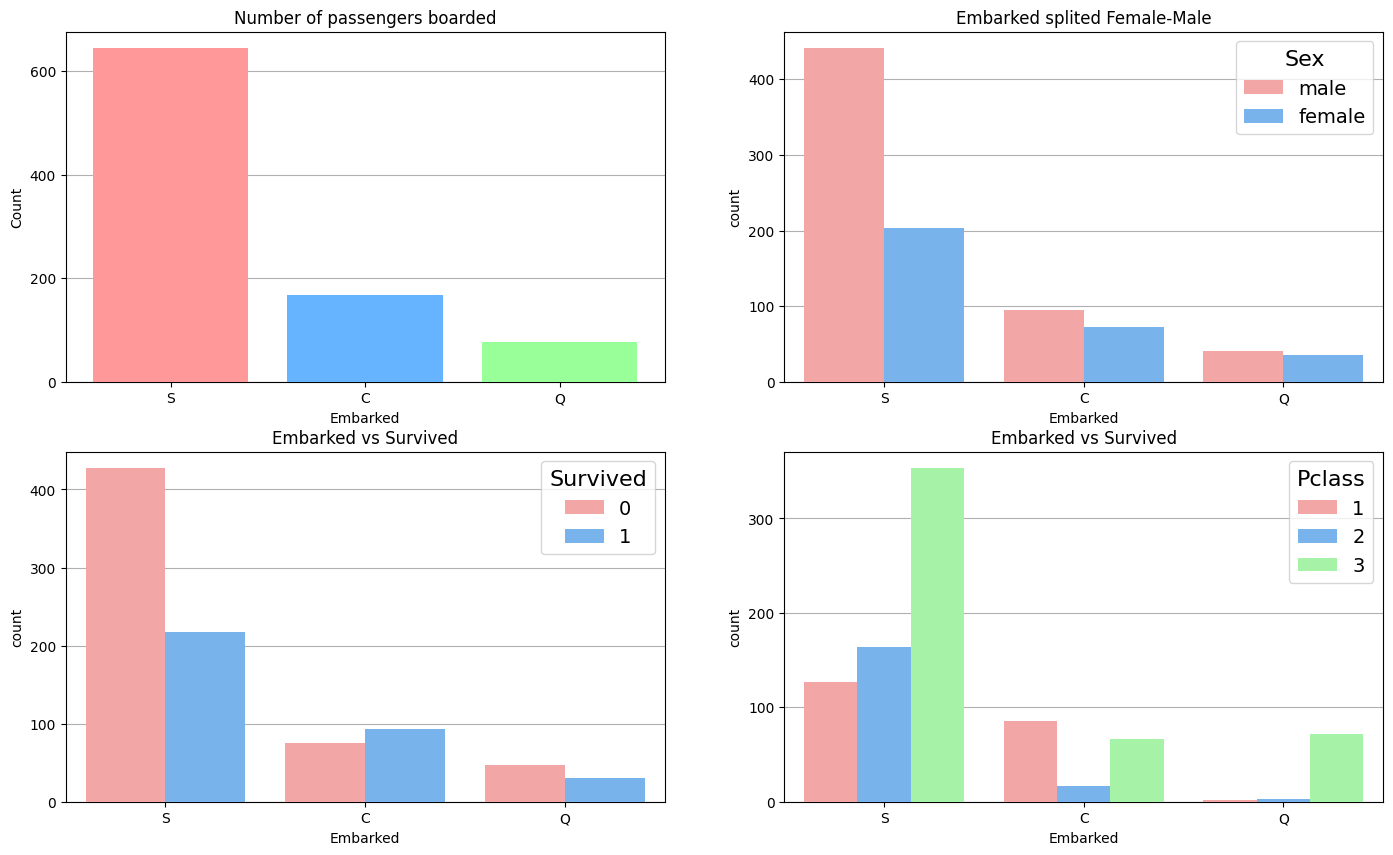

In [14]:
embarked_counts = dataset["Embarked"].value_counts()
print(embarked_counts)

fig, axes = plt.subplots(2, 2, figsize=(17, 10))

colors = ["#ff9999", "#66b3ff"]

axes[0, 0].bar(embarked_counts.index.astype(str), embarked_counts, color=["#ff9999", "#66b3ff", "#99ff99"], width=0.8, zorder=3)
axes[0, 0].grid(axis="y", zorder=0)
axes[0, 0].set_yticks(range(0, 601, 200))
axes[0, 0].set_xlabel("Embarked")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Number of passengers boarded")

axes[0, 1].set_title("Embarked splited Female-Male")
sns.countplot(data=dataset, x="Embarked", hue="Sex", ax=axes[0, 1], palette=colors, zorder=3)
axes[0, 1].grid(axis="y", zorder=0)
axes[0, 1].legend(title="Sex", title_fontsize=16, fontsize=14)

axes[1, 0].set_title("Embarked vs Survived")
sns.countplot(data=dataset, x="Embarked", hue="Survived", ax=axes[1, 0], palette=colors, zorder=3)
axes[1, 0].grid(axis="y", zorder=0)
axes[1, 0].set_yticks(range(0, 401, 100))
axes[1, 0].legend(title="Survived", title_fontsize=16, fontsize=14)

axes[1, 1].set_title("Embarked vs Survived")
sns.countplot(data=dataset, x="Embarked", hue="Pclass", ax=axes[1, 1], palette=["#ff9999", "#66b3ff", "#99ff99"], zorder=3)
axes[1, 1].grid(axis="y", zorder=0)
axes[1, 1].set_yticks(range(0, 301, 100))
axes[1, 1].legend(title="Pclass", title_fontsize=16, fontsize=14)


***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

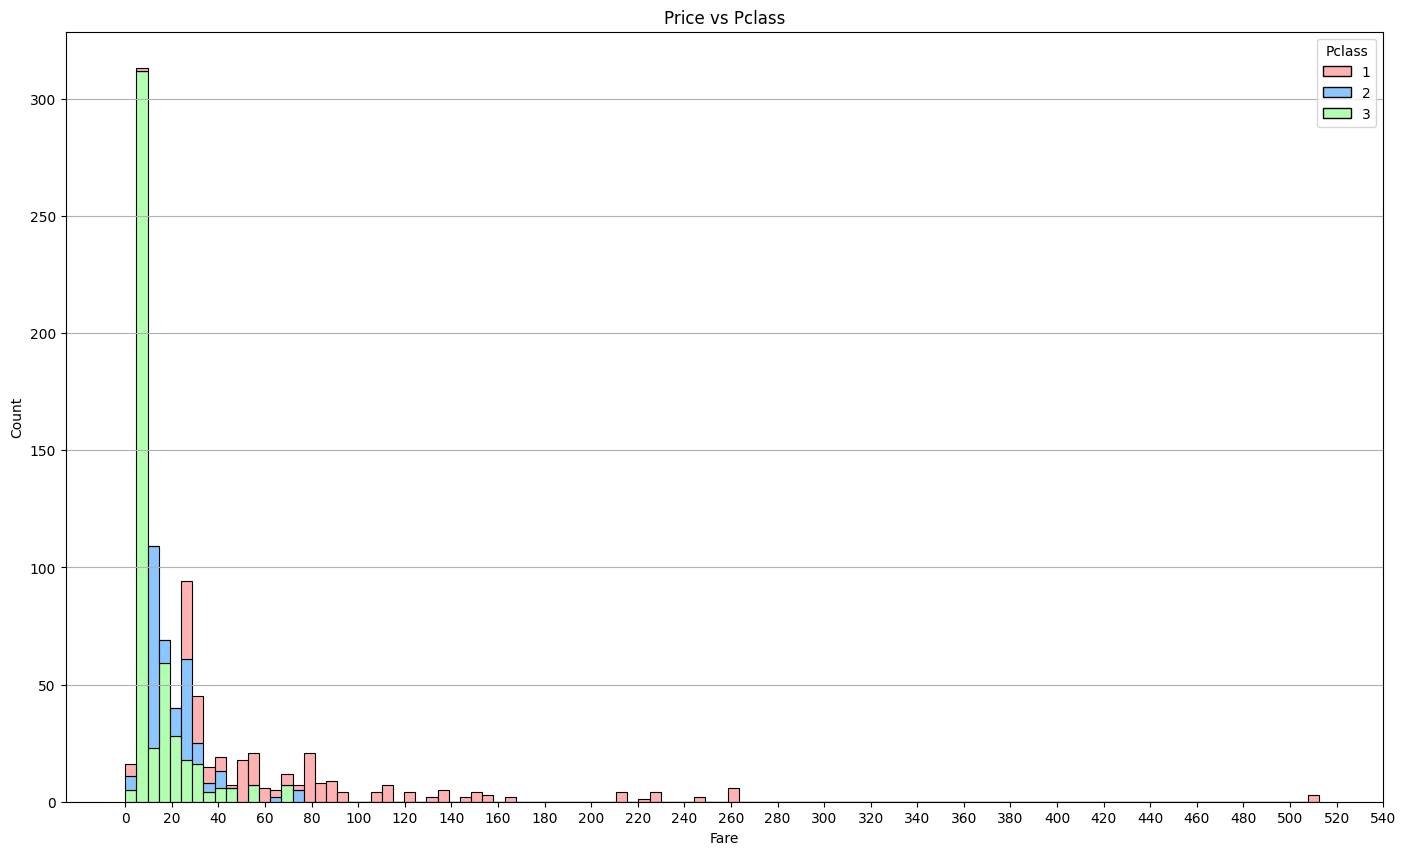

In [15]:
fig, axes = plt.subplots(figsize=(17, 10))

plt.title("Price vs Pclass")
sns.histplot(data=dataset, x="Fare", hue="Pclass", palette=["#ff9999", "#66b3ff", "#99ff99"], multiple="stack")
plt.xticks(range(0, 550, 20))
plt.grid(axis="y")

plt.show()


Прокоментуйте побудовані графіки

Серед виживших більше жінок, бо їх пропускали. Пасажири гірших класів мали менший приорітет при спасінні. Найбільше людей віком 19-35 років в двох випадках. 3 класу було найбільше, але звідти й найбільше смертей. Найпопулярніші імена - Анна і Вільям. 61% зі всіх людей на титаніку не змогли вижити.